<a href="https://colab.research.google.com/github/erinmcmahon26/Financial_Data/blob/main/RNN_Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ingest Data

In [185]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, SimpleRNN, BatchNormalization
from sklearn.metrics import mean_squared_error

import seaborn as sns
import tensorflow as tf

In [186]:
df = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/Financial_Data/main/it.csv')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1259 non-null   object 
 1   Close/Last  1259 non-null   float64
 2   Volume      1259 non-null   object 
 3   Open        1259 non-null   float64
 4   High        1259 non-null   float64
 5   Low         1259 non-null   float64
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


In [188]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/02/2022,4386.54,--,4322.56,4401.48,4322.56
1,03/01/2022,4306.26,--,4363.14,4378.45,4279.54
2,02/28/2022,4373.94,--,4354.17,4388.84,4315.12
3,02/25/2022,4384.65,--,4298.38,4385.34,4286.83
4,02/24/2022,4288.70,--,4155.77,4294.73,4114.65


### EDA

In [189]:
df.describe()

,Close/Last,Open,High,Low
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,3192.298928,3191.924234,3208.506458,3173.734734
std,690.115533,689.771762,693.402610,686.152071
min,2237.400000,2290.710000,2300.730000,2191.860000
25%,2695.475000,2691.405000,2711.000000,2678.390000
50%,2922.940000,2918.560000,2931.680000,2905.440000
75%,3642.920000,3642.210000,3655.950000,3631.365000
max,4796.560000,4804.510000,4818.620000,4780.040000


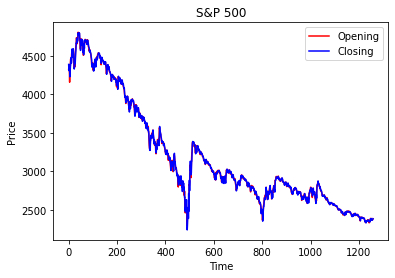

In [190]:
plt.plot(df['Open'], color = 'red', label = 'Opening')
plt.plot(df['Close/Last'], color = 'blue', label = 'Closing')
plt.title('S&P 500')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [191]:
df = df.sort_index(ascending=True, axis=0)

In [192]:
df.index = df.Date
df.drop(['Date', 'Volume', 'Open', 'High','Low'], axis=1, inplace=True)

In [193]:
dataset = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

Need to apply scale due to LSTM being sensative to the scale of the input data. 

In [194]:
train = dataset[0:round(df.shape[0]*.8),:]
valid = dataset[round(df.shape[0]*.8):round(df.shape[0]*.9),:]
test = dataset[round(df.shape[0]*.9):,:]
print(len(train), len(valid), len(test))

1007 126 126


In [195]:
real_closing_price = test

In [196]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### Models

In [197]:
model_1 = Sequential([
              SimpleRNN(20, return_sequences=True,input_shape=(x_train.shape[1],1)),
              SimpleRNN(20, return_sequences=True),
              SimpleRNN(1)
])

model_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_1.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
30/30 - 3s - loss: 0.0190 - accuracy: 0.0011 - 3s/epoch - 96ms/step
Epoch 2/20
30/30 - 1s - loss: 0.0056 - accuracy: 0.0011 - 780ms/epoch - 26ms/step
Epoch 3/20
30/30 - 1s - loss: 0.0039 - accuracy: 0.0011 - 771ms/epoch - 26ms/step
Epoch 4/20
30/30 - 1s - loss: 0.0026 - accuracy: 0.0011 - 785ms/epoch - 26ms/step
Epoch 5/20
30/30 - 1s - loss: 0.0022 - accuracy: 0.0011 - 848ms/epoch - 28ms/step
Epoch 6/20
30/30 - 1s - loss: 0.0019 - accuracy: 0.0011 - 784ms/epoch - 26ms/step
Epoch 7/20
30/30 - 1s - loss: 0.0017 - accuracy: 0.0011 - 776ms/epoch - 26ms/step
Epoch 8/20
30/30 - 1s - loss: 0.0016 - accuracy: 0.0011 - 754ms/epoch - 25ms/step
Epoch 9/20
30/30 - 1s - loss: 0.0015 - accuracy: 0.0011 - 776ms/epoch - 26ms/step
Epoch 10/20
30/30 - 1s - loss: 0.0015 - accuracy: 0.0011 - 769ms/epoch - 26ms/step
Epoch 11/20
30/30 - 1s - loss: 0.0013 - accuracy: 0.0011 - 777ms/epoch - 26ms/step
Epoch 12/20
30/30 - 1s - loss: 0.0012 - accuracy: 0.0011 - 768ms/epoch - 26ms/step
Epoch 13/20
30/3

In [198]:
inputs = df[len(df) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price_1 = model_1.predict(X_test)
closing_price_1 = scaler.inverse_transform(closing_price_1)

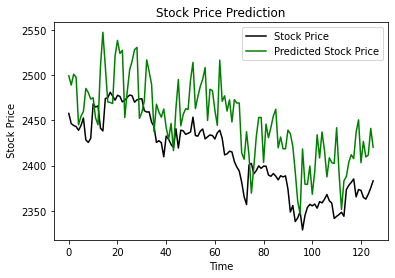

In [199]:
plt.plot(real_closing_price, color = 'black', label = 'Stock Price')
plt.plot(closing_price_1, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

#### Long Short Term Memory (LSTM)  (3 Layers)

In [200]:
model_2 = Sequential([
                    LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1],1)),
                    Dropout(0.2),
                    LSTM(units = 50, return_sequences=True),
                    Dropout(0.2),
                    LSTM(units = 50),
                    Dropout(0.2),
                    Dense(units=1)
])
model_2.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['accuracy']) 
model_2.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
30/30 [==============================] - 8s 90ms/step - loss: 0.0259 - accuracy: 0.0011
Epoch 2/20
30/30 [==============================] - 3s 89ms/step - loss: 0.0041 - accuracy: 0.0011
Epoch 3/20
30/30 [==============================] - 3s 90ms/step - loss: 0.0037 - accuracy: 0.0011
Epoch 4/20
30/30 [==============================] - 3s 94ms/step - loss: 0.0035 - accuracy: 0.0011
Epoch 5/20
30/30 [==============================] - 3s 90ms/step - loss: 0.0036 - accuracy: 0.0011
Epoch 6/20
30/30 [==============================] - 3s 91ms/step - loss: 0.0032 - accuracy: 0.0011
Epoch 7/20
30/30 [==============================] - 3s 88ms/step - loss: 0.0032 - accuracy: 0.0011
Epoch 8/20
30/30 [==============================] - 3s 94ms/step - loss: 0.0033 - accuracy: 0.0011
Epoch 9/20
30/30 [==============================] - 3s 94ms/step - loss: 0.0029 - accuracy: 0.0011
Epoch 10/20
30/30 [==============================] - 3s 93ms/step - loss: 0.0029 - accuracy: 0.0011
Epoch 11/

In [201]:
inputs = df[len(df) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price_2 = model_2.predict(X_test)
closing_price_2 = scaler.inverse_transform(closing_price_2)

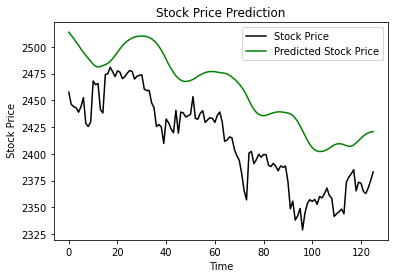

In [202]:
plt.plot(real_closing_price, color = 'black', label = 'Stock Price')
plt.plot(closing_price_2, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

#### Long Short Term Memory (LSTM)  (5 Layers)

In [203]:
model_3 = Sequential([
                    LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1],1)),
                    Dropout(0.2),
                    LSTM(units = 50, return_sequences=True),
                    Dropout(0.2),
                    LSTM(units = 50, return_sequences=True),
                    Dropout(0.2),
                    LSTM(units = 50, return_sequences=True),
                    Dropout(0.2),
                    LSTM(units=50),
                    Dropout(0.2),
                    Dense(units=1)
])
model_3.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['accuracy']) 
model_3.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
30/30 [==============================] - 13s 149ms/step - loss: 0.0337 - accuracy: 0.0011
Epoch 2/20
30/30 [==============================] - 4s 148ms/step - loss: 0.0071 - accuracy: 0.0011
Epoch 3/20
30/30 [==============================] - 4s 150ms/step - loss: 0.0051 - accuracy: 0.0011
Epoch 4/20
30/30 [==============================] - 4s 149ms/step - loss: 0.0053 - accuracy: 0.0011
Epoch 5/20
30/30 [==============================] - 4s 147ms/step - loss: 0.0045 - accuracy: 0.0011
Epoch 6/20
30/30 [==============================] - 4s 148ms/step - loss: 0.0043 - accuracy: 0.0011
Epoch 7/20
30/30 [==============================] - 5s 150ms/step - loss: 0.0044 - accuracy: 0.0011
Epoch 8/20
30/30 [==============================] - 5s 153ms/step - loss: 0.0043 - accuracy: 0.0011
Epoch 9/20
30/30 [==============================] - 5s 156ms/step - loss: 0.0053 - accuracy: 0.0011
Epoch 10/20
30/30 [==============================] - 4s 148ms/step - loss: 0.0043 - accuracy: 0.001

In [204]:
inputs = df[len(df) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price_3 = model_3.predict(X_test)
closing_price_3 = scaler.inverse_transform(closing_price_3)

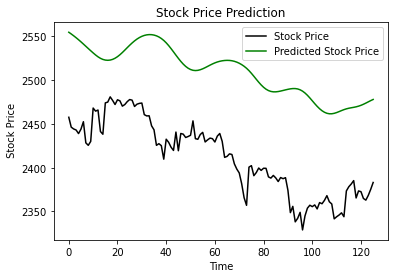

In [205]:
plt.plot(real_closing_price, color = 'black', label = 'Stock Price')
plt.plot(closing_price_3, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

It looks like the more layers/more complicated the RNN, the worse it peforms on this dataset. Even though the accuracy is the same for each model, the graphs are able to show the difference between the models performances. 

### Conclusions

RNNs had a hard time with this dataset. I think one of the major challenges was that the stock prices from the past 5 years were all over the place and decreasing from a really high point. It would have been better to look at data from before 2019 as it would be a bit easier to predict pre pandemic. 